# Interview Assesment ML Q4

Q-4. Imagine you working as a sale manager now you need to predict the Revenue and whether that particular revenue is on the weekend or not and find the Informational_Duration using the Ensemble learning algorithm Dataset This is the Dataset You can use this dataset for this question.


In [1]:

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [5]:
df=pd.read_csv('online_shoppers_intention.csv')

In [6]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Univariate Analysis

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12330.0,NaN,NaN,NaN,2.315166,3.321784,0.0,0.0,1.0,4.0,27.0
Administrative_Duration,12330.0,NaN,NaN,NaN,80.818611,176.779107,0.0,0.0,7.5,93.25625,3398.75
Informational,12330.0,NaN,NaN,NaN,0.503569,1.270156,0.0,0.0,0.0,0.0,24.0
Informational_Duration,12330.0,NaN,NaN,NaN,34.472398,140.749294,0.0,0.0,0.0,0.0,2549.375
ProductRelated,12330.0,NaN,NaN,NaN,31.731468,44.475503,0.0,7.0,18.0,38.0,705.0
ProductRelated_Duration,12330.0,NaN,NaN,NaN,1194.74622,1913.669288,0.0,184.1375,598.936905,1464.157214,63973.52223
BounceRates,12330.0,NaN,NaN,NaN,0.022191,0.048488,0.0,0.0,0.003112,0.016813,0.2
ExitRates,12330.0,NaN,NaN,NaN,0.043073,0.048597,0.0,0.014286,0.025156,0.05,0.2
PageValues,12330.0,NaN,NaN,NaN,5.889258,18.568437,0.0,0.0,0.0,0.0,361.763742
SpecialDay,12330.0,NaN,NaN,NaN,0.061427,0.198917,0.0,0.0,0.0,0.0,1.0


In [8]:
x=df.columns
for i in x:
    print(df[i],df[i].unique())

0        0
1        0
2        0
3        0
4        0
        ..
12325    3
12326    0
12327    0
12328    4
12329    0
Name: Administrative, Length: 12330, dtype: int64 [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
12325    145.0
12326      0.0
12327      0.0
12328     75.0
12329      0.0
Name: Administrative_Duration, Length: 12330, dtype: float64 [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Informational, Length: 12330, dtype: int64 [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12325    0.0
12326    0.0
12327    0.0
12328    0.0
12329    0.0
Name: Informational_Duration, Length: 12330, dtype: float64 [  0.   120.    16

Text(0.5, 0, 'Revenue')

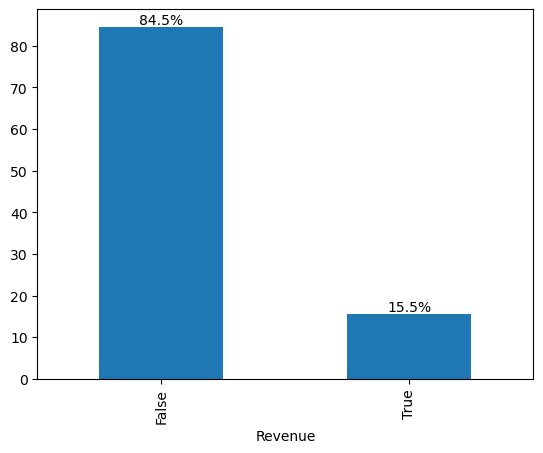

In [11]:
count=df['Revenue'].value_counts()
per=(count/len(df))*100
ax=per.plot(kind='bar')



# Displaying the percentage values on top of each bar
for i, v in enumerate(per):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
plt.xlabel('Revenue')


Insights:-

    We can see that the percentage of revenue from the sales that has been converted is 15.5%

    The revenue is highly imbalanced.



<AxesSubplot:xlabel='Month', ylabel='count'>

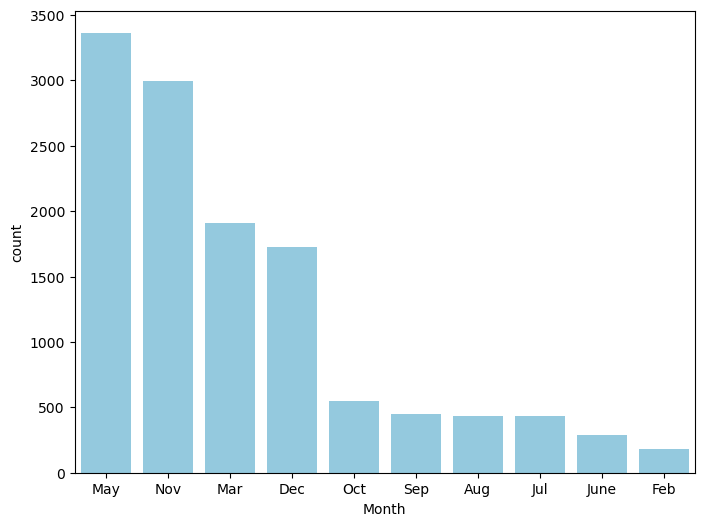

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Month', order=df['Month'].value_counts().index, color='skyblue')


F:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VisitorType', ylabel='count'>

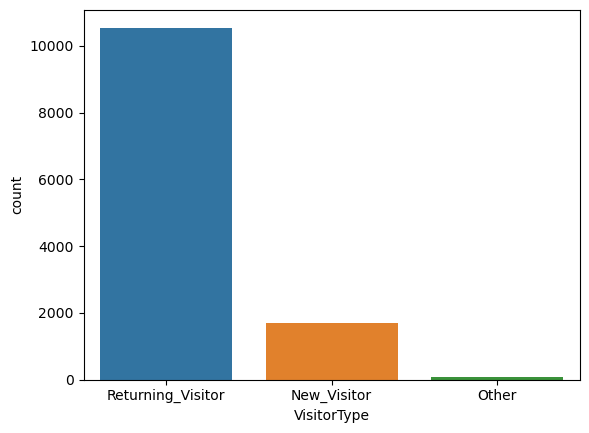

In [13]:
sns.countplot(df['VisitorType'])

Insights:-

    We can see that the Returning customers number is way too high.



Text(0.5, 0, 'Weekend')

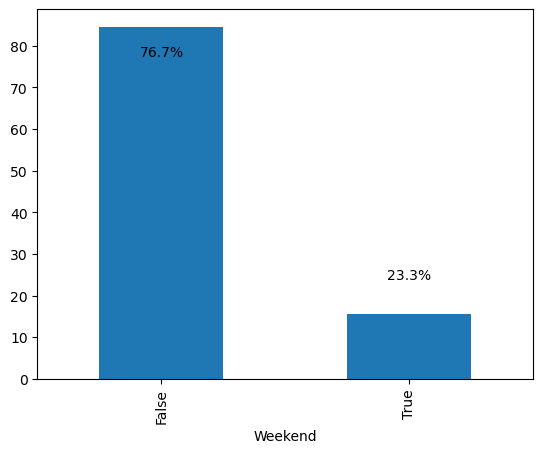

In [14]:
ax=per.plot(kind='bar')
count=df['Weekend'].value_counts()
per=(count/len(df))*100

# Displaying the percentage values on top of each bar
for i, v in enumerate(per):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
plt.xlabel('Weekend')


Insights:-

    Most Sales conversion has happened in the weekend



## Bivariate Analysis of Numerical Data

<AxesSubplot:xlabel='OperatingSystems', ylabel='Revenue'>

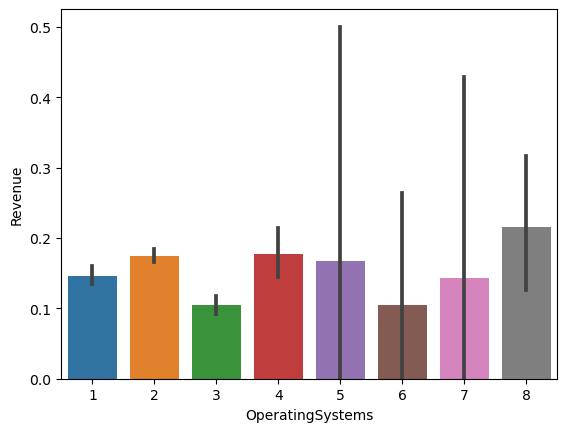

In [15]:
sns.barplot(data=df,x='OperatingSystems',y='Revenue')

<AxesSubplot:xlabel='Browser', ylabel='Revenue'>

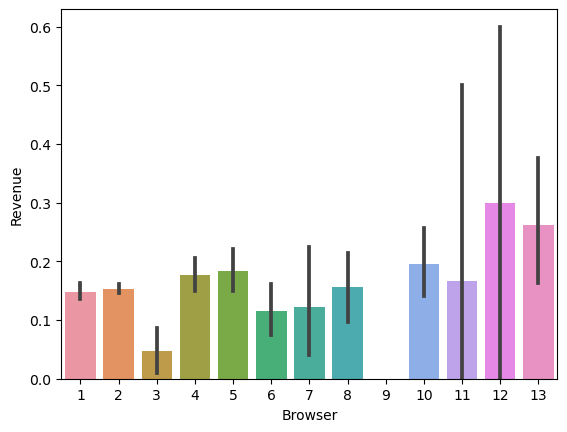

In [16]:
sns.barplot(data=df,x='Browser',y='Revenue')

<AxesSubplot:xlabel='Region', ylabel='Revenue'>

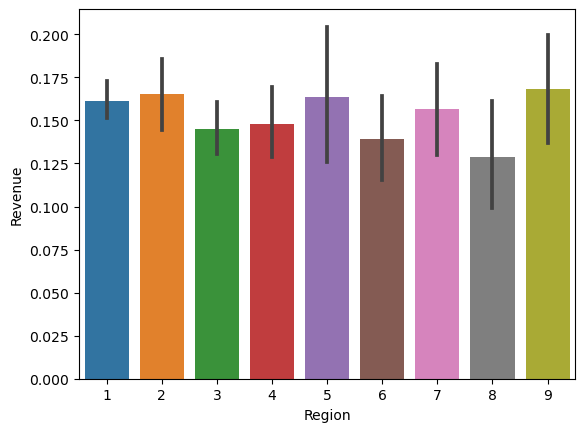

In [17]:
sns.barplot(data=df,x='Region',y='Revenue')

<AxesSubplot:xlabel='TrafficType', ylabel='Revenue'>

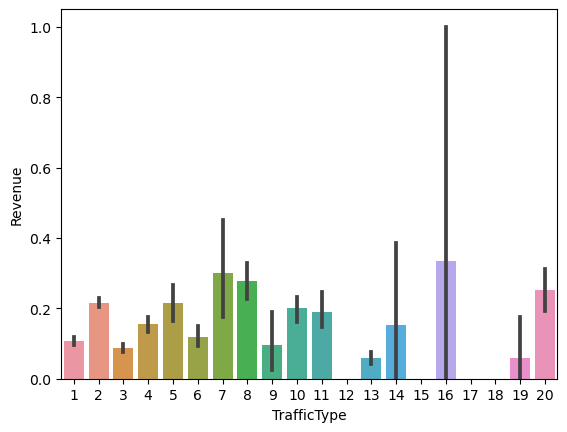

In [18]:
sns.barplot(data=df,x='TrafficType',y='Revenue')

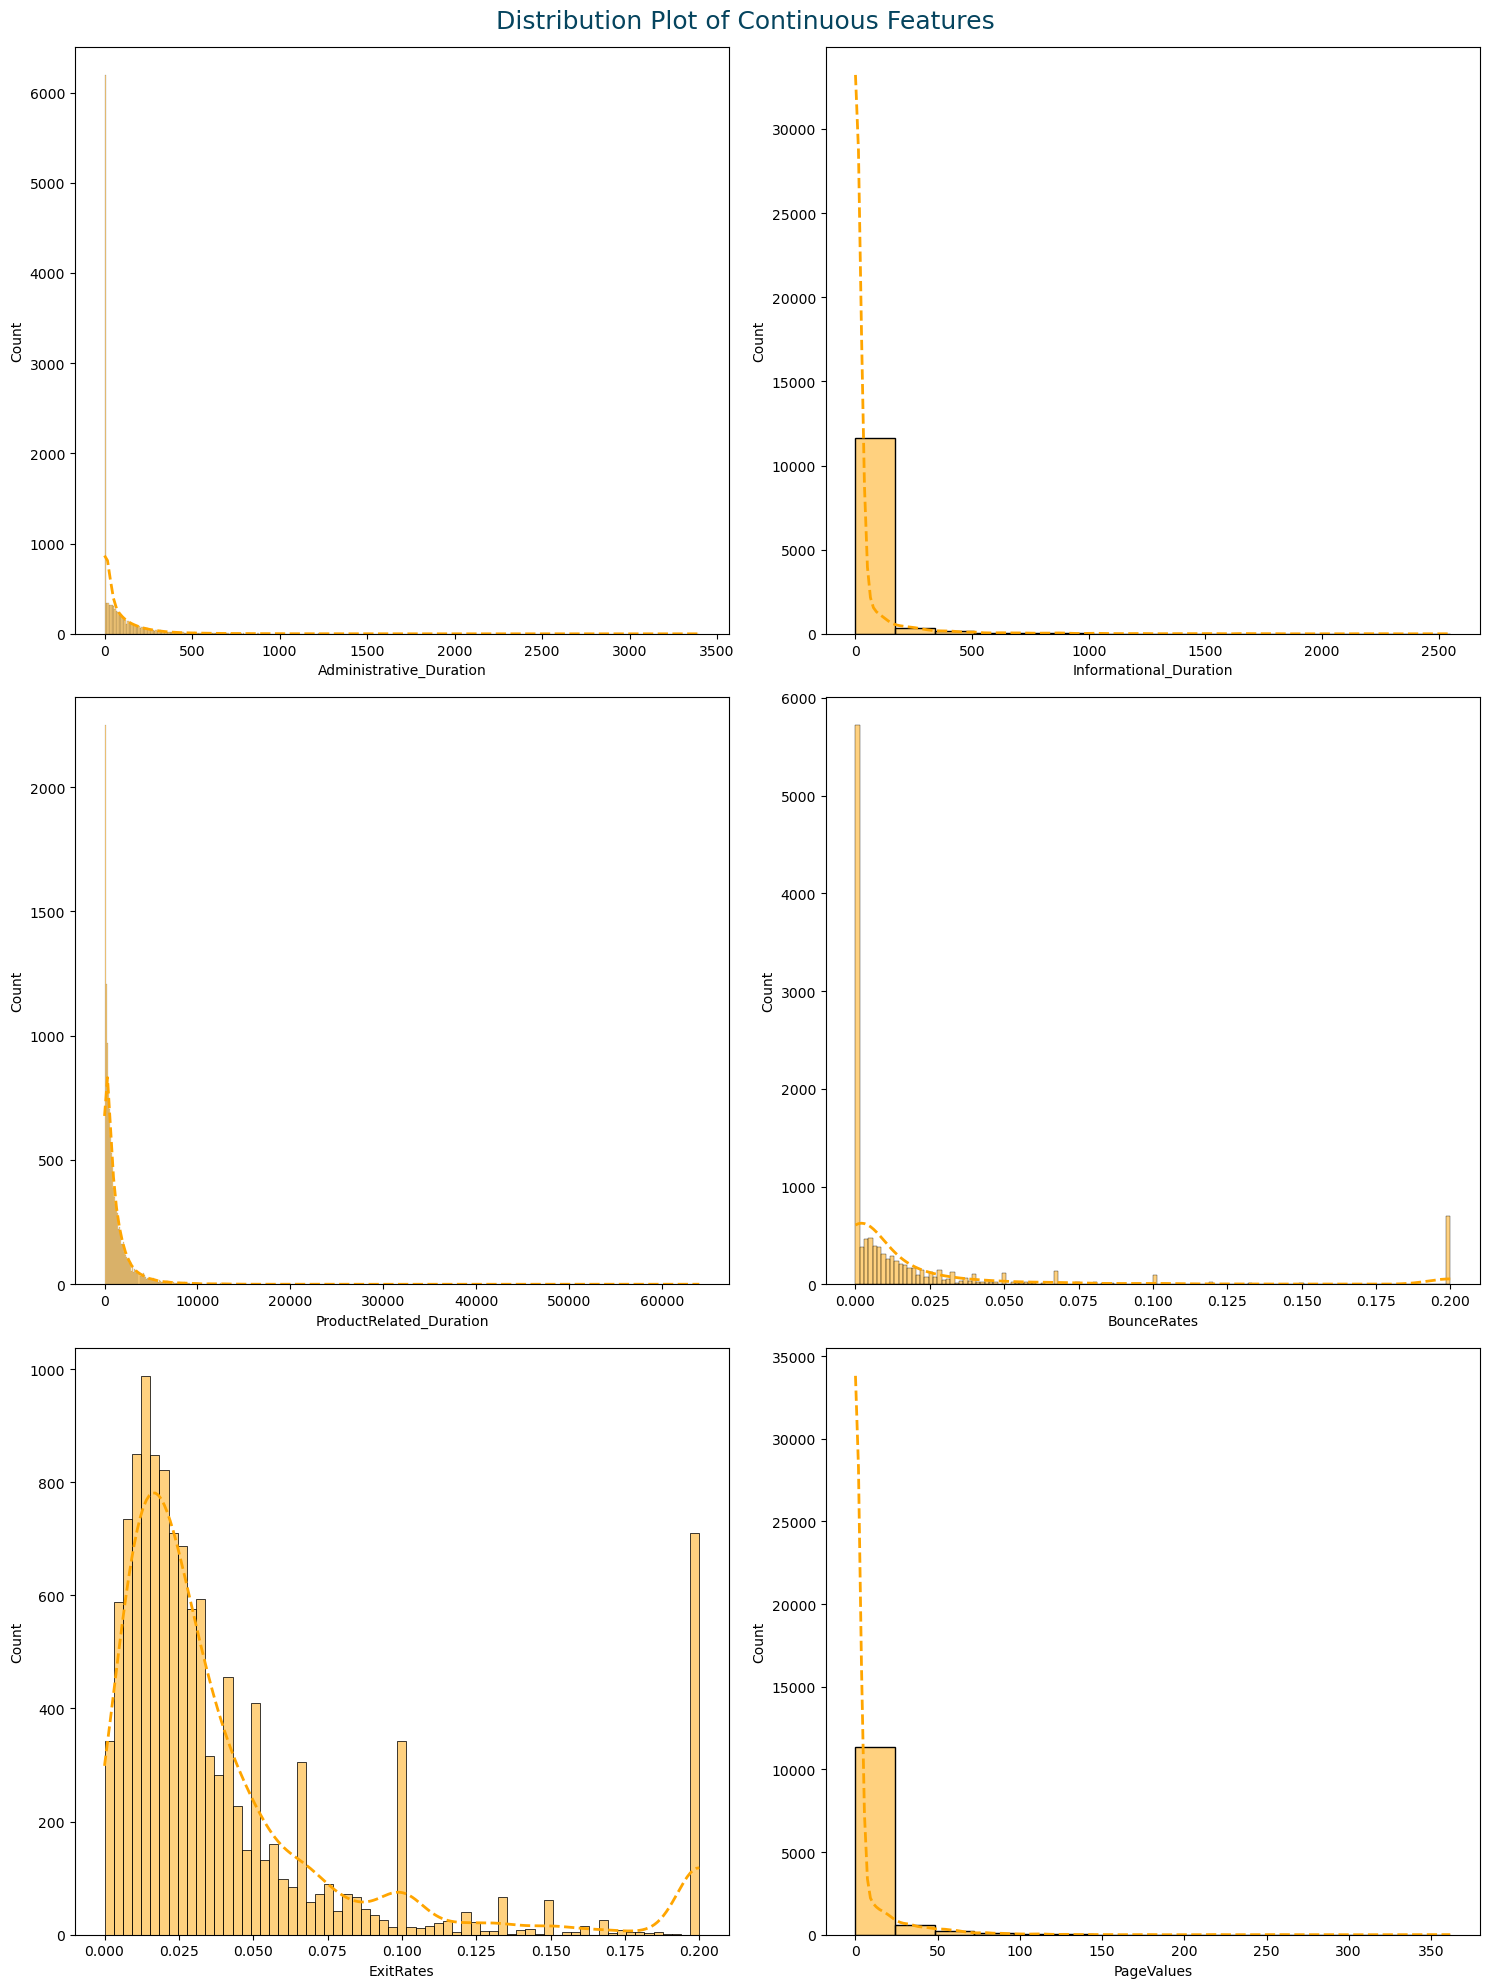

In [19]:
continuous_features = ['Administrative_Duration', 
                       'Informational_Duration', 
                       'ProductRelated_Duration', 
                       'BounceRates', 
                       'ExitRates', 
                       'PageValues']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
axs = np.ravel(axs)
for i, col in enumerate(continuous_features):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'lw':2, 'ls':'--'}, color='orange')

plt.suptitle("Distribution Plot of Continuous Features", fontsize=18, color='#05445E', va='bottom')
plt.tight_layout()
plt.show()

In [20]:
data=df

In [21]:
# Convert target variable to categorical
data['Revenue'] = data['Revenue'].astype(str)
# Extract the relevant features for revenue prediction
features = data.drop(['Revenue'], axis=1)
# Convert weekend column to numerical values (0 for False, 1 for True)
features['Weekend'] = features['Weekend'].astype(int)
# Convert informational duration column to numerical values (0 for False, 1 for True)
features['Informational_Duration'] = features['Informational_Duration'].apply(lambda x: 1 if x > 0 else 0)
# Encode categorical features using one-hot encoding
features = pd.get_dummies(features)
# Extract the target variable (Revenue)
target = data['Revenue']

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


### Doing Model Building Using Random Forest Classifier

In [23]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Predict the revenue on the test set
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
# Print the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8961881589618816
Confusion Matrix:
[[1985   70]
 [ 186  225]]


### Conclusion-

This model predicts the revenue with an accuracy of 89%
